# Julia 基礎圖表繪製：圖表結合敘述統計

## 作業 024：繪製帶統計資訊的圖表

繪製 iris 資料的散佈圖，x 軸為 PetalLength，y 軸為 PetalWidth，並依不同花的種類分別算出 PetalLength 及 PetalWidth 的平均值，將平均值以鉛直線與水平線標在圖上。（請完成以下程式碼）

In [1]:
using StatsBase, RDatasets
using Gadfly

In [2]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


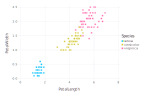

In [6]:
p = plot(iris, x="PetalLength", y="PetalWidth", color="Species", Geom.point)

In [4]:
using Printf

In [7]:
gd = groupby(iris, :Species)
d=length(gd)
arrayLen = Array{Float64}(undef, d)
arrayWd = Array{Float64}(undef, d)
for i in 1:length(gd)
    gdi=gd[i]
    specieName=gdi[1, :Species]
    avgLen=mean(gdi[!, :PetalLength])
    avgWdt=mean(gdi[!, :PetalWidth])
    @printf("Species=%-24s\tPetal Length Avg.=%6.2f\tWidth Avg.=%6.2f\n", specieName, avgLen, avgWdt)

    arrayLen[i]=avgLen
    arrayWd[i]=avgWdt
end

Species=setosa                  	Petal Length Avg.=  1.46	Width Avg.=  0.25
Species=versicolor              	Petal Length Avg.=  4.26	Width Avg.=  1.33
Species=virginica               	Petal Length Avg.=  5.55	Width Avg.=  2.03


In [10]:
arrayLen

3-element Array{Float64,1}:
 1.4620000000000002
 4.26              
 5.552             

In [11]:
arrayWd

3-element Array{Float64,1}:
 0.2459999999999999
 1.3259999999999998
 2.026             

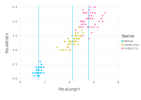

In [12]:
p = plot(iris, x="PetalLength", y="PetalWidth", color="Species", xintercept=[arrayLen[1], arrayLen[2], arrayLen[3]], Geom.vline, Geom.point)

In [14]:
import Cairo, Fontconfig

In [15]:
draw(PNG("vline.png", 12cm, 9cm), p)

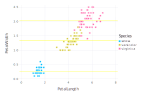

In [16]:
p = plot(iris, x="PetalLength", y="PetalWidth", color="Species", yintercept=[arrayWd[1], arrayWd[2], arrayWd[3]], Geom.hline(color="yellow"), Geom.point)

In [17]:
draw(PNG("hline.png", 12cm, 9cm), p)

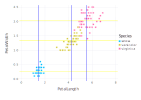

In [18]:
p = plot(iris, x="PetalLength", y="PetalWidth", color="Species", 
xintercept=[arrayLen[1], arrayLen[2], arrayLen[3]], Geom.vline(color="blue"), 
yintercept=[arrayWd[1], arrayWd[2], arrayWd[3]], Geom.hline(color="yellow"), 
Geom.point)

In [19]:
draw(PNG("vhline.png", 12cm, 9cm), p)